In [1]:
# file:///C:/Users/Kyle/Downloads/Supervised%20Learning%20Rubric.pdf
# https://www.basketball-reference.com/teams/LAL/2025/gamelog/

Will the lakers win their next game? Logistic Regression on 24-25 season

Problem:

How does the lakers currently perform this season? How well will the lakers perform against different teams this season? How well will the lakers perform in the next game? All of these questions can be answered using this logistic regression model that predicts whether or not the lakers will win when evaluating features related to the game. This model can be used by fans to determine whether or not it is worth it to go watch the next game or for analytics teams to determine how their team is performing and how they would perform in theoretical situations. Since this model is predicting the outcome of the game win or loss, it is a classification problem and will use the logistic regression model to predict outcomes.

Exploratory Data Analysis (EDA) procedure:

Since the model that will be used is logistic regression, an ROC curve will be used to evaluate the model's true positive rate vs the false positive rate. Other metrics that will also be evaluated are precision and recall of the predictions. 

In [2]:
from math import exp
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

About the Data:

All data were collected from basketball-reference.com in the form of tabulated data. Basketball Reference is a public source that provides up to date nba statistics. Since the project is only aiming to predict the performance of the current laker's team this season, only 24/82 games were played so far meaning the data has 24 entries. However there are many features per entry including: stats about the lakers and their opponent each game. There are about 37 features in this dataset. The first three features are all categorical features such as the location, outcome and opponent team. The rest of the features are numeric about how the team and the opponent played such as points, steals, turnovers, etc.

Collecting and Cleaning Data:

To collect the data I visited basketball-reference.com and selected the advanced game log data of each game from the current 2024-25 season. There was an option to download a csv so I downloaded it and formatted it on a spreadsheet. There were a few issues with the dataset. One issue was that some features were not relevant so those were dropped, namely the dates and game count. The second issue was that some categorical data were strings and needed to be encoded, these were the home/away, win/lose, opponent team features. The first two features were easily cleaned and replaced in the spread sheet software, but encoding the teams was done to the pandas data frame in the import function below. Numbers were assigned to each team to keep track of them for the model to train. The third issue was empty columns which were easily removed in the spreadsheet software. The fourth issue was that there were collinear features. Using a correlation matrix, I was able to spot some collinear features with high correlation so I removed one of the features to remove the collinearity.

Conclusions and Discussion:

To conclude, the cleaning process was removing irrelevant features, data munging, removing empty columns, and removing collinear features. There were not any missing values as all games have statistics so no rows were dropped. Since the target variable is whether or not the lakers will win or not based on the other features, this problem seems to be a classification problem and can be done well using logistic regression. In total the data frame after cleaning is 24 rows and 28 features.

Basketball Reference. (n.d.). 2024-25 Los Angeles Lakers team game log. Basketball. https://www.basketball-reference.com/teams/LAL/2025/gamelog/ 

In [13]:
class data_import:

    def __init__(self):
        df = pd.read_csv("../laker_data.csv")
        
        # encode the opponent teams into numbers
        encoder = LabelEncoder()
        team_labels = encoder.fit_transform(df["Opp"])
        df["Opp"] = team_labels
        
        y = df["W/L"].values
        # dropping collinear features in x
        x = df.drop(["W/L", "FG", "FGopp", "3P", "3Popp", "FT", "FTopp", "STLopp", "PFopp"], axis=1).values

        self.train_x, self.test_x, self.train_y, self.test_y = train_test_split(x, y, test_size = 0.2, random_state = 42)
        self.df = df

data = data_import()
data.df.corr().abs()

(24, 28)


,Location,Opp,W/L,Tm,Opp.1,FG,FGA,FG%,3P,3PA,...,FTopp,FTAopp,FT%opp,ORBopp,TRBopp,ASTopp,STLopp,BLKopp,TOVopp,PFopp
Location,1.000000,0.142881,0.342657,0.263171,0.225050,0.139568,0.299217,0.433470,0.355459,0.123231,...,0.473831,0.500664,0.120899,0.046122,0.235409,0.246714,0.036551,0.367851,0.194885,0.094726
Opp,0.142881,1.000000,0.641900,0.271455,0.451682,0.170489,0.129878,0.329628,0.084992,0.046824,...,0.032275,0.118252,0.454752,0.082557,0.406297,0.254265,0.426352,0.011366,0.118507,0.066028
W/L,0.342657,0.641900,1.000000,0.527133,0.465800,0.409243,0.002184,0.512282,0.280529,0.098189,...,0.389440,0.353410,0.284114,0.022058,0.470817,0.270912,0.429475,0.176633,0.113197,0.047363
Tm,0.263171,0.271455,0.527133,1.000000,0.239681,0.858609,0.281138,0.812625,0.640990,0.183580,...,0.472093,0.399400,0.366237,0.031954,0.469821,0.191250,0.161100,0.160978,0.124103,0.472563
Opp.1,0.225050,0.451682,0.465800,0.239681,1.000000,0.174093,0.154742,0.081815,0.042173,0.106696,...,0.262129,0.236947,0.260483,0.286656,0.039360,0.793045,0.471883,0.155644,0.000873,0.292020
FG,0.139568,0.170489,0.409243,0.858609,0.174093,1.000000,0.575537,0.719060,0.559177,0.179897,...,0.445757,0.411783,0.279942,0.026456,0.349030,0.207665,0.154554,0.162807,0.200143,0.119019
FGA,0.299217,0.129878,0.002184,0.281138,0.154742,0.575537,1.000000,0.150639,0.142410,0.217136,...,0.312177,0.357576,0.039421,0.125260,0.261241,0.030723,0.346037,0.464106,0.201552,0.105660
FG%,0.433470,0.329628,0.512282,0.812625,0.081815,0.719060,0.150639,1.000000,0.560669,0.026178,...,0.282810,0.203676,0.306423,0.143353,0.642516,0.213405,0.082877,0.187840,0.083097,0.256339
3P,0.355459,0.084992,0.280529,0.640990,0.042173,0.559177,0.142410,0.560669,1.000000,0.549813,...,0.634068,0.600340,0.368856,0.086733,0.195691,0.018628,0.051343,0.367385,0.084936,0.081340
3PA,0.123231,0.046824,0.098189,0.183580,0.106696,0.179897,0.217136,0.026178,0.549813,1.000000,...,0.440715,0.487067,0.097934,0.155146,0.046256,0.259013,0.172220,0.097886,0.147251,0.248031


Building Logistic Regression Model

Hyperparameter Tuning:

Chose to use liblinear as the solver for the LogisticRegression model because it is recommended for smaller datasets, my dataset only has 24 samples so it would be considered small. Random state to a random value to shuffle the data.

In [9]:
clf = LogisticRegression(solver="liblinear" ,random_state=10).fit(data.train_x, data.train_y) # liblinear solver is best used for smaller datasets like mine

yp = clf.predict(data.test_x)
ypp = clf.predict_proba(data.test_x) # the probabilities of predicting outcome label as win or loss

Plotting the ROC curve

Text(0.7, 0.2, 'AUC=0.833')

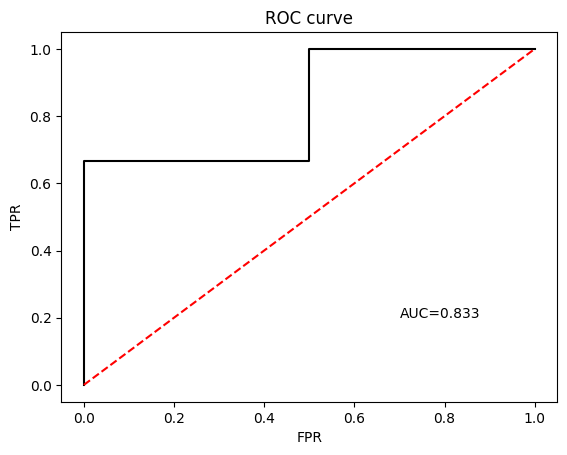

In [10]:
fpr, tpr, th = roc_curve(data.test_y,ypp[:,1])
auc = roc_auc_score(data.test_y,ypp[:,1])
plt.plot(fpr,tpr,"k-")
plt.plot(np.arange(0,1.1,0.1), np.arange(0,1.1,0.1), "r--")
plt.title("ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.text(0.7, 0.2,"AUC=" + "{:.3f}".format(auc))

Analysis:

The red line represents the random guess. The curve seems to be 2 right angles, one at just under 0.7 and one that peaks at 1.0. The area under the curve (AUC) is also at 0.833. What this curve shows us is that the the true positive rate is around 0.65 and the false positive rate is around 0.35 until the true positive rate is at 1.0 which is when the false positive rate is at 0.0. The curve has a relatively large AUC indicating a good performance from the model to distinguish between wins and losses.

Calculate Precision and Recall

In [6]:
def calculate_precision(y_true, y_pred):
    # true positive divided by true and false positives
    n = len(y_true)
    tp = 0
    fp = 0
    for i in range(n):
        if y_true[i] == 1 and y_pred[i] == 1: # check for true positive
            tp += 1
        elif y_true[i] == 0 and y_pred[i] == 1: # check for false positive
            fp += 1
    return tp / (tp + fp)

def calculate_recall(y_true, y_pred):
    # true positive divided by true positive and false negatives
    n = len(y_true)
    tp = 0
    fn = 0
    for i in range(n):
        if y_true[i] == 1 and y_pred[i] == 1: # check for true positive
            tp += 1
        elif y_true[i] == 1 and y_pred[i] == 0: # check for false negative
            fn += 1
    
    return tp/(tp + fn)

precision = calculate_precision(data.test_y, yp)
recall = calculate_recall(data.test_y, yp)
print('Model Precision : ' , precision)
print('Model Recall : ' , recall)
print("y true: ", data.test_y)
print("y prediction: ", yp)

Model Precision :  1.0
Model Recall :  0.6666666666666666
y true:  [1 0 1 0 1]
y prediction:  [0 0 1 0 1]


Analysis:

The precision of the model at 1.0 means that for all the positive values it predicted they are all correct. In this context positive means a win for the lakers. This is true if we look at the y-true and y-prediction, each win or 1 value in the prediction list is also 1 in the y-true list. In other words, the model's prediction of 1 (win) values are always correct. Do not get confused about the 0 (lose) values, those can be wrong as precision does not measure those.

The recall of the model at 0.666 means that for all the positive values in the actual list, the model only correctly predicted 66.6% of them correctly. This can be seem when comparing the y-true and y-prediction lists, at the first index of the y-prediction list it incorrectly predicts a loss when it should have been a win for the lakers, the rest of the win predictions (1 in the list) seem to match the y-true list. In other words, the model's percentage of correctly predicting a win is only 66.6% of the time. Sometimes the model will predict a loss when in reality it was a win.

Calculate Accuracy

In [7]:
def calculate_accuracy(y_true, y_pred):
    n = len(y_true)
    correct = 0
    for i in range(n):
        if y_true[i] == y_pred[i]:
            correct += 1

    return correct / n

accuracy = calculate_accuracy(data.test_y, yp)
print("accuracy: ", accuracy)

accuracy:  0.8


Analysis:

The accuracy is 0.8 or 80% meaning that the logistic regression model correctly predicts the outcome of the games 80% of the time.

In [8]:
predictions = []
print(ypp)
print("actual y: ", data.test_y)
print("y predictions: ",yp)

for i in range(len(ypp)):
    if ypp[i][1] > 0.5:
        predictions.append(1)
    else:
        predictions.append(0)


[[7.78238877e-01 2.21761123e-01]
 [9.99758293e-01 2.41707151e-04]
 [9.12716707e-02 9.08728329e-01]
 [7.32553123e-01 2.67446877e-01]
 [5.98741555e-02 9.40125845e-01]]
actual y:  [1 0 1 0 1]
y predictions:  [0 0 1 0 1]


Results and Discussion/Conclusion:

To recap the results, the AUC in the ROC plot was 0.833 meaning that the true positive rate is generally higher than the false positive rate, the precision was 1.0 meaning that the model's predictions of wins always match the actual outcome, the recall was 0.666 meaning that the model's predictions of wins are only 66.66% of all the actual win outcomes, the accuracy was 0.8 meaning that the outcome predicted is 80% correct.

What I learned was the considerations that are needed to take when selecting features for logistic regression classification. Using the correlation matrix was a needed step that I almost forgot to include when considering collinearity and how much some features were correlated with another. At first I did not consider this and the model overfitted, causing the AUC to be at 1.0 but after adjusting the features by dropping some, the AUC and other metrics seemed more realistic. 

Something that did not work was trying to include every feature from the raw data into training the model. As mentioned earlier, it led to overfitting and an unrealistic performance metrics. 

One way to improve is to perhaps wait later on in the season when there are more games to be samples in the dataset. This will help reduce overfitting and will give a more accurate way to measure performance. Another way to improve is to consider more features that are not related to the game box score such as players available at each game, minutes of star players, etc.